# Practice Project 6_Advertising Sales Channel Prediction

# Advertising Sales Channel Prediction is a regressio based problem statement to predict sales from different sales channels. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel to build a predictive model to predict the total sales generated from all the sales channel.

# Importing Data From Github repository dsrscientist/DSData/master/Advertising.csv

In [1]:
import pandas as pd
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')
data=data.drop('Unnamed: 0', axis=1)
data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [2]:
print('DataFrame View: ')
print('View 1: Head View: ', end='\n'*2)
print(data.head(), end='\n'*2)
print('View 2: Sample View: ', end='\n'*2)
print(data.sample(), end='\n'*2)
print('View 3: Tail View: ', end='\n'*2)
print(data.tail(), end='\n'*2)

DataFrame View: 
View 1: Head View: 

      TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

View 2: Sample View: 

       TV  radio  newspaper  sales
117  76.4    0.8       14.8    9.4

View 3: Tail View: 

        TV  radio  newspaper  sales
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4



In [3]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [4]:
data.shape

(200, 4)

In [5]:
type(data), type(data.columns)

(pandas.core.frame.DataFrame, pandas.core.indexes.base.Index)

In [6]:
data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [7]:
data.isna().values.any()

False

# Observations:
1. There are 200 rows and 4 columns.
2. There are 0 categorical columns and 4 continuous columns.
3. Therefore, useful columns are very low.
4. There are no null or missing values, hence, imputation and missing values traeatment are not required.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
data.isna().values.any()

False

In [10]:
data.isnull().any()

TV           False
radio        False
newspaper    False
sales        False
dtype: bool

# EDA

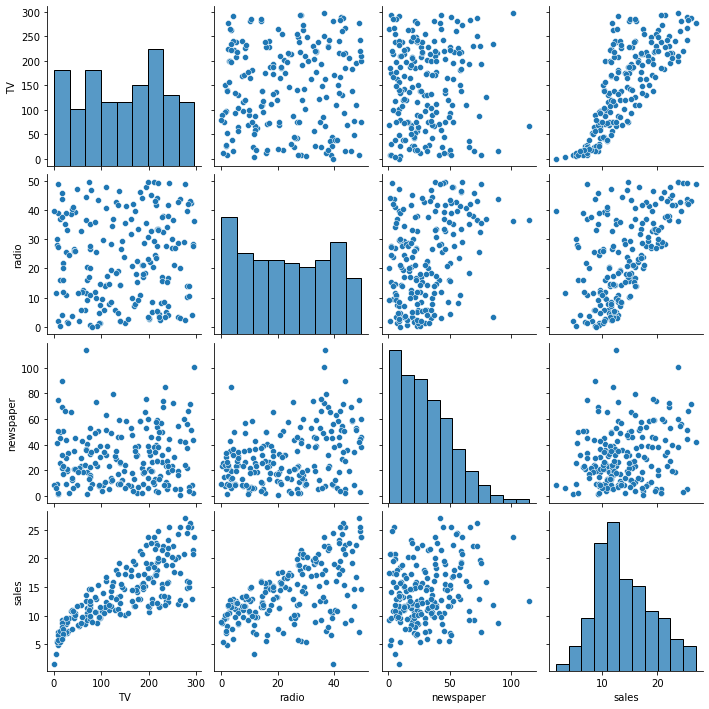

In [11]:
import seaborn as sns
sns.pairplot(data)

In [12]:
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [13]:
data.corr()['sales']

TV           0.782224
radio        0.576223
newspaper    0.228299
sales        1.000000
Name: sales, dtype: float64

<AxesSubplot:>

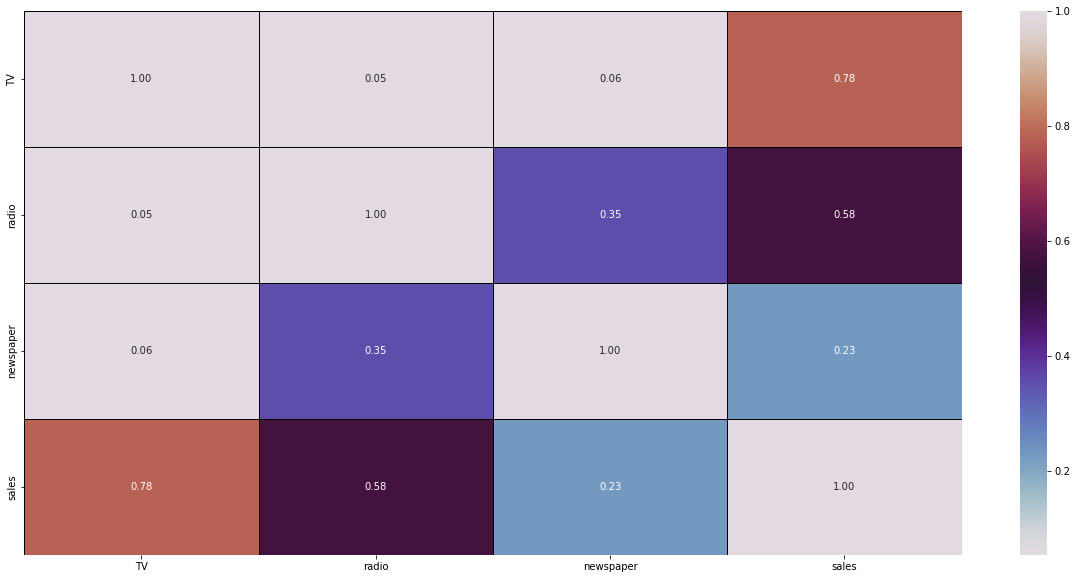

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(21,10))
sns.heatmap(data.corr(), annot=True, linewidths=0.5, linecolor='black', fmt='.2f', cmap='twilight')

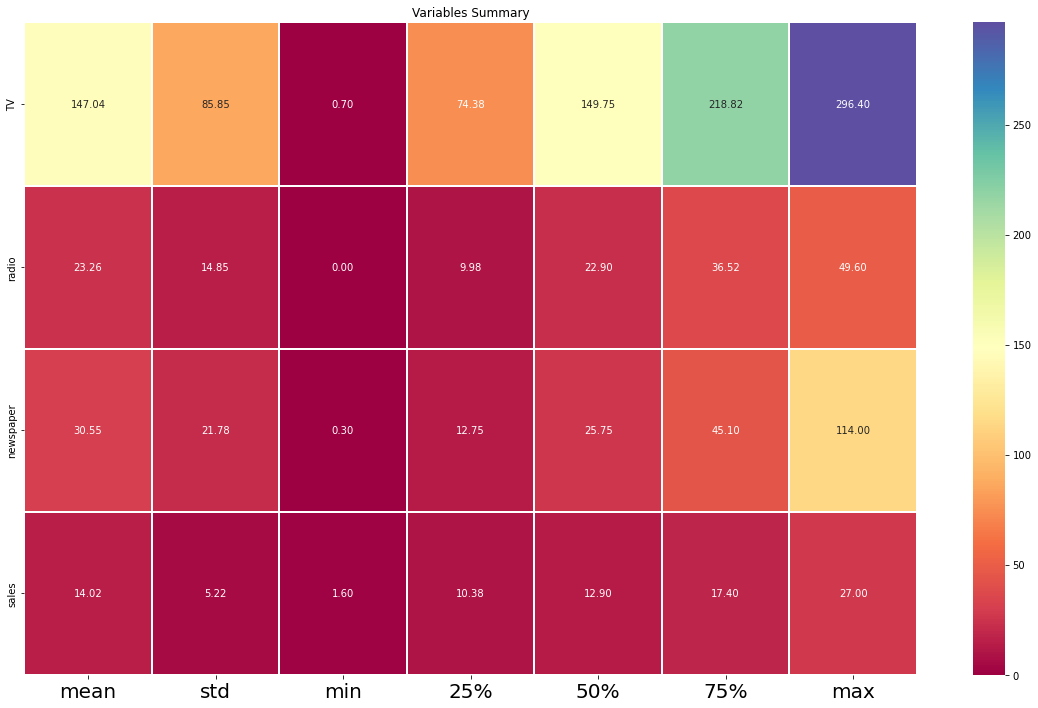

In [15]:
import numpy as np
mask = np.zeros_like(round(data.describe()[1:].transpose(),2))
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,12))
sns.heatmap(round(data.describe()[1:].transpose(),2), linewidth=2, annot=True, fmt='.2f', square=False, cmap="Spectral")
plt.xticks(fontsize=20)
plt.yticks(fontsize=10)
plt.title('Variables Summary')
plt.savefig('heatmap.png')
plt.show()

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
data.select_dtypes(include = [np.number]).columns

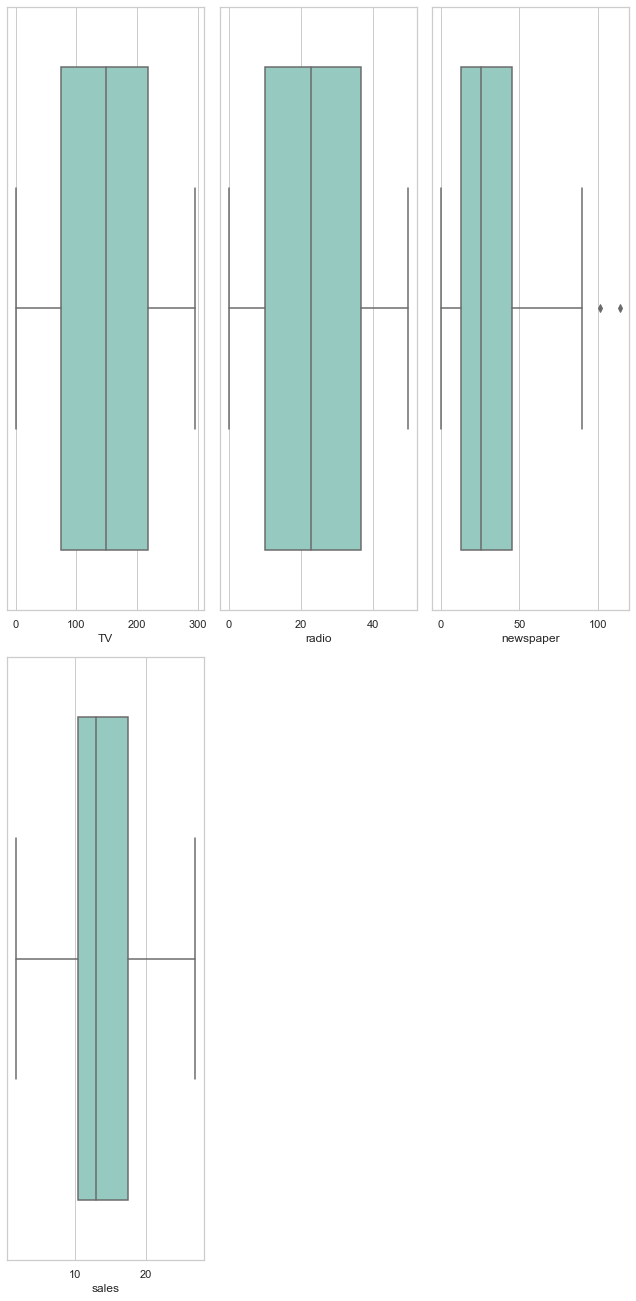

In [20]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
colist=data.select_dtypes(include = [np.number]).columns
ncol=3
nrows=10
plt.figure(figsize=(ncol*3, ncol*30))
for x in range(0,len(colist)):
    sns.set_theme(style='whitegrid')
    plt.subplot(nrows, ncol, x+1)
    sns.boxplot(data[colist[x]], color='Black', palette='Set3')
    plt.tight_layout()

In [21]:
data.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

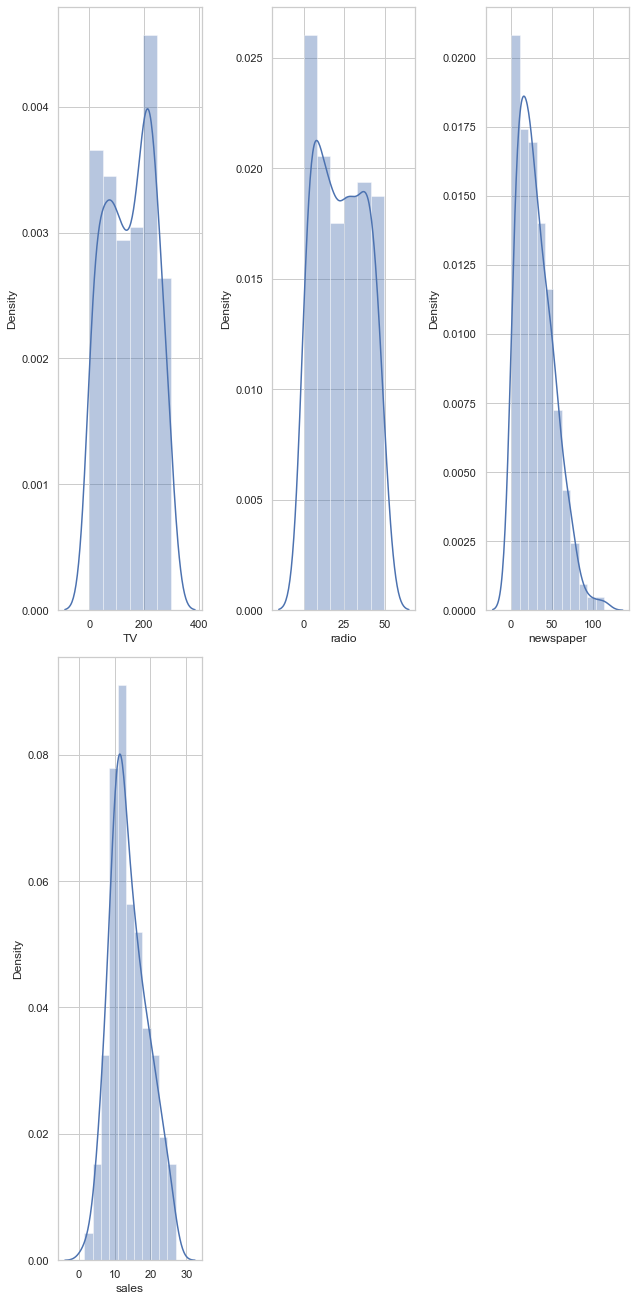

In [22]:
colist=data.select_dtypes(include = [np.number]).columns
ncol=3
nrows=10
plt.figure(figsize=(ncol*3, ncol*30))
for x in range(0,len(colist)):
    sns.set_theme(style='whitegrid')
    plt.subplot(nrows, ncol, x+1)
    sns.distplot(data[colist[x]])
    plt.tight_layout()

# Observations
1. All the features share positive to strong positive correlation with each other.
2. All the features share positive to strong positive correlation with each other.
3. Features with strong positive correlation with sales are:
TV           0.782224
radio        0.576223
4. Correlation of feature with itself is of no  relevance.
5. Acceptable skewness is +/- 0.65
6. Left Skewness is found in:
TV          -0.069853
7. Right Skewness is found in:
newspaper    0.894720
sales        0.407571
8. High number of outliers can be noticed in newspaper column.

# Z Score: Outliers Treatment

In [23]:
import numpy as np
from scipy.stats import stats
score=np.abs(stats.zscore(data))
score.shape

(200, 4)

In [24]:
#threshold=(-3,3)
threshold=3
print(np.where(score>3))

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))


In [25]:
data.iloc[4]

TV           180.8
radio         10.8
newspaper     58.4
sales         12.9
Name: 4, dtype: float64

In [26]:
len(np.where(score>3)[0])

2

In [27]:
data_new=data[(score<3).all(axis=1)]
data_new

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# In this section, I have identified outliers in 101 rows and removed those from the dataset, to make more precise prediction.

# Vectorization

In [29]:
x=data_new.drop('sales', axis=1)
x

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [31]:
y=data_new['sales']
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 198, dtype: float64

# I have removed sales from the data and parsed all other features in  x vector, I have parsed sales in y vector.

# Standard Scaler Transformation And Variance Inflation Factor

In [32]:
import sklearn
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
scaler=StandardScaler()
X_scaled=scaler.fit_transform(x)
X_scaled_frame=pd.DataFrame(X_scaled, columns=x.columns)
X_scaled_frame

,TV,radio,newspaper
0,0.978697,0.989521,1.932998
1,-1.199012,1.090705,0.751313
2,-1.519332,1.535913,1.937901
3,0.056456,1.225616,1.408349
4,0.400243,-0.831784,1.403446
...,...,...,...
193,-1.272932,-1.310720,-0.783407
194,-0.615864,-1.229773,-1.062892
195,0.355657,-0.932968,-1.146248
196,1.606431,1.272836,1.785900


In [33]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled, w) for w in range(X_scaled.shape[1])]
vif['Features']=x.columns
vif

,vif,Features
0,1.003863,TV
1,1.137887,radio
2,1.137631,newspaper


# Since, all the features reflect low vif below 6, there is no need till now to reduce columns.

# Feature Selection

In [34]:
from sklearn.feature_selection import f_classif, f_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.feature_selection import VarianceThreshold

In [35]:
Xf_train, Xf_test, Y_train, Y_test=train_test_split(x,y,test_size=0.10)

In [36]:
constant_filter=VarianceThreshold(threshold=0.04)
constant_filter.fit(Xf_train)
Xf_train_filter=constant_filter.transform(Xf_train)
Xf_test_filter=constant_filter.transform(Xf_test)

<AxesSubplot:>

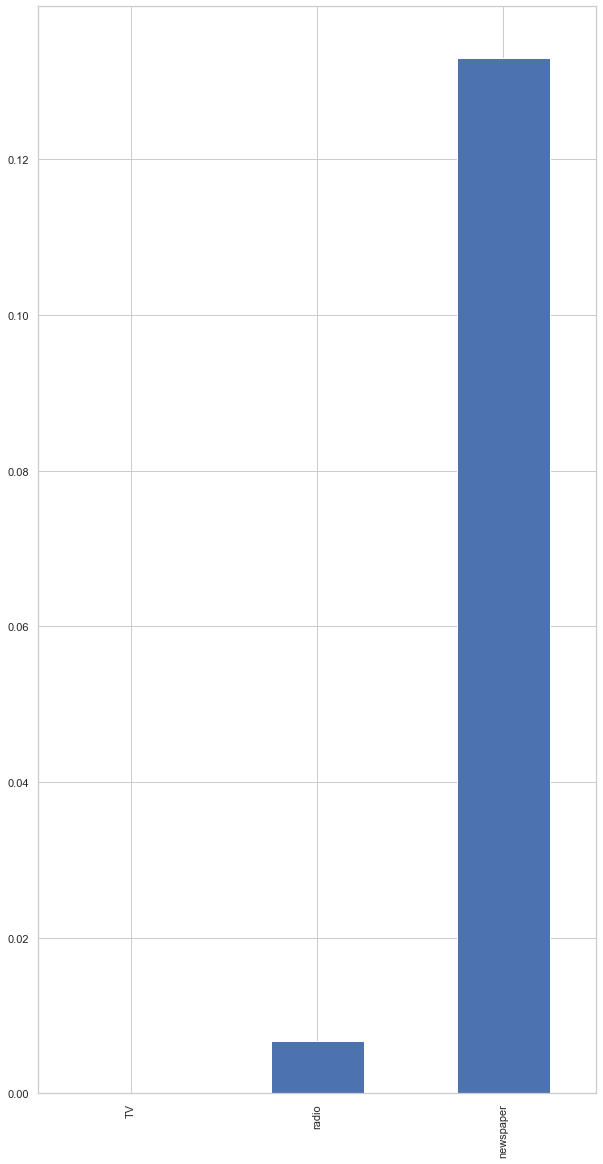

In [37]:
sel=f_classif(Xf_train, Y_train)
p_values=pd.Series(sel[1])
p_values.index=Xf_train.columns
p_values.sort_values(ascending=True, inplace=True)
p_values.plot.bar(figsize=(10,20))

In [38]:
p_values=p_values[p_values<0.05]
p_values.index

Index(['TV', 'radio'], dtype='object')

# P Values are an important component of feature selection, with significance level set to 0.05, Variance Threshold
    ensemble technique returns with 95% confidence, all the features that have maximum explanatory capacity
For the present dataset features with pvalues with less than 0.05 are:
Index(['TV', 'radio'], dtype='object')

In [39]:
import numpy as np
x=x[['TV', 'radio']]
x.sample()

,TV,radio
166,17.9,37.6


In [40]:
y.sample()

62    15.7
Name: sales, dtype: float64

In [41]:
x.shape, y.shape

((198, 2), (198,))

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10)

In [43]:
x_train.shape, y_train.shape

((178, 2), (178,))

# Model Development, Evaluation And Saving

# Model 1

# Random Forest Regressor With Grid Search CV Hyper Parameter Tuning

In [44]:
from sklearn.ensemble import RandomForestRegressor as el
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_boston
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, make_scorer, r2_score
import matplotlib.pyplot as plt
import pickle
rfc2=el()
params = {
 'n_estimators': [50, 100],
 'criterion' : ['squared_error','absolute_error', 'poisson'],
 'bootstrap': [True, False],
 'oob_score':[True, False],
 'n_jobs':[None,-1],
 'warm_start':[True, False]
}
score2 = make_scorer(mean_squared_error)
gridsearch=GridSearchCV(rfc2, params, cv=5, return_train_score=True)
gridsearch.fit(x_train, y_train)
best_parameters=gridsearch.best_params_
best_score=gridsearch.best_score_
best_estim=gridsearch.best_estimator_
best_estim.fit(x_train,y_train)
y_pred2=best_estim.predict(x_train)
mse2 = mean_squared_error(y_pred2,y_train)
model3_train_score=best_estim.score(x_train, y_train)
model3_test_score=best_estim.score(x_test, y_test)
rmse2=np.sqrt(mse2)
ytst_pred2=best_estim.predict(x_test)
mse_test2=mean_squared_error(ytst_pred2,y_test)
rmse_test2=np.sqrt(mse_test2)
model3_save=pickle.dumps(best_estim)
model3_prediction_train=pd.DataFrame({'y_train':y_train, 'yhat':y_pred2})
model3_prediction_test=pd.DataFrame({'y_test':y_test, 'yhat':ytst_pred2})

In [45]:
print('Train Score: ',model3_train_score)
print('Test Score: ',model3_test_score)
print('MSE Train: ',mse2)
print('RMSE Train: ',rmse2)
print('MSE Test: ',mse_test2)
print('RMSE Train: ',rmse_test2)

Train Score:  0.9976271247396712
Test Score:  0.9836631982186603
MSE Train:  0.06428398876404467
RMSE Train:  0.2535428736210992
MSE Test:  0.4027936499999991
RMSE Train:  0.6346602634480901



# Model 2

# Random Forest Regressor With Default Hyper Parameter Tuning

In [46]:
from sklearn.ensemble import RandomForestRegressor as el
from sklearn.model_selection import cross_val_score
rfc=el()
rfc.fit(x_train, y_train)
print(rfc.score(x_train, y_train))
print(rfc.score(x_test, y_test))
scores=cross_val_score(rfc, x, y, cv=5)
cv_scores=scores.mean()
print(scores.std())
print(cv_scores)

0.997412413698488
0.9808599243173965
0.00951973949366438
0.9793132820643764


In [47]:
model3_save=pickle.dumps(rfc)

# Model 3

# Ada Boost Regressor And Random Forest Regressor With Grid Search CV Hyper Parameter Tuning and Ada Boost Boosting

In [48]:
from sklearn.datasets import load_boston
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, make_scorer, r2_score
import matplotlib.pyplot as plt
abreg = AdaBoostRegressor()
params = {
 'n_estimators': [50, 100],
 'learning_rate' : [0.01, 0.05, 0.1, 0.5],
 'loss' : ['linear', 'square', 'exponential']
 }
score = make_scorer(mean_squared_error)
print(score)

make_scorer(mean_squared_error)


In [49]:
gridsearch=GridSearchCV(abreg, params, cv=5, return_train_score=True)
gridsearch.fit(x_train, y_train)
GridSearchCV(cv=5, error_score='raise', estimator=AdaBoostRegressor(base_estimator=rfc, learning_rate=1.0,loss='linear', n_estimators=50, random_state=None), n_jobs=1, param_grid={'n_estimators': [50, 100],'learning_rate': [0.01, 0.05, 0.1, 0.5],'loss': ['linear', 'square', 'exponential']},pre_dispatch='2*n_jobs', refit=True, return_train_score=True,scoring=None, verbose=0) 

GridSearchCV(cv=5, error_score='raise',
             estimator=AdaBoostRegressor(base_estimator=RandomForestRegressor()),
             n_jobs=1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.5],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 100]},
             return_train_score=True)

In [50]:
print(gridsearch.best_params_)
print(gridsearch.best_score_)

{'learning_rate': 0.5, 'loss': 'exponential', 'n_estimators': 100}
0.9599228913133991


In [51]:
best_estim=gridsearch.best_estimator_
print(best_estim)

AdaBoostRegressor(learning_rate=0.5, loss='exponential', n_estimators=100)


In [52]:
best_estim.fit(x_train,y_train)

ytr_pred=best_estim.predict(x_train)
mse = mean_squared_error(ytr_pred,y_train)
print('Train Score: ', best_estim.score(x_train, y_train))
print('Test score: ', best_estim.score(x_test, y_test))

Train Score:  0.9781290293197129
Test score:  0.9661809330821027


In [53]:
ytst_pred=best_estim.predict(x_test)
print('mse_train', mse)
print('rmse_train', np.sqrt(mse))
mse_test = mean_squared_error(ytst_pred,y_test)
print('mse_test', mse_test)
print('rmse_test', np.sqrt(mse_test))

mse_train 0.5925103847538662
rmse_train 0.7697469615099927
mse_test 0.8338293863009063
rmse_test 0.9131425881541756


In [54]:
model3_save=pickle.dumps(abreg)

# Model 4

# Extra Trees Regressor With Grid Search CV Hyper Parameter Tuning

In [55]:
abreg = sklearn.ensemble.ExtraTreesRegressor()
params = {
 'n_estimators': [50, 100],
 'max_samples' : [0.01, 0.05, 0.1, 0.5],
 'bootstrap' : [True, False],
 'oob_score' : [True, False],
 'warm_start' : [True, False],
 'n_jobs'  : [1,-1],
 'random_state' : [0,10,100,1000,10000,100000,100000],
 'criterion' : ['squared_error', 'absolute_error'] 
 }
score = make_scorer(mean_squared_error)
print(score)

make_scorer(mean_squared_error)


In [56]:
gridsearch=GridSearchCV(abreg, params, cv=5, return_train_score=True)
gridsearch.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['squared_error', 'absolute_error'],
                         'max_samples': [0.01, 0.05, 0.1, 0.5],
                         'n_estimators': [50, 100], 'n_jobs': [1, -1],
                         'oob_score': [True, False],
                         'random_state': [0, 10, 100, 1000, 10000, 100000,
                                          100000],
                         'warm_start': [True, False]},
             return_train_score=True)

In [57]:
print(gridsearch.best_params_)
print(gridsearch.best_score_)

{'bootstrap': True, 'criterion': 'squared_error', 'max_samples': 0.5, 'n_estimators': 50, 'n_jobs': 1, 'oob_score': True, 'random_state': 1000, 'warm_start': True}
0.9847142262820257


In [58]:
best_estim=gridsearch.best_estimator_
print(best_estim)

ExtraTreesRegressor(bootstrap=True, max_samples=0.5, n_estimators=50, n_jobs=1,
                    oob_score=True, random_state=1000, warm_start=True)


In [59]:
best_estim.fit(x_train,y_train)

ytr_pred=best_estim.predict(x_train)
yts_pred=best_estim.predict(x_test)
mse = mean_squared_error(ytr_pred,y_train)
print('Train Score: ', best_estim.score(x_train, y_train))
print('Test score: ', best_estim.score(x_test, y_test))
print('mse_train: ', mse)
print('rmse_train', np.sqrt(mse))
mse_test=mean_squared_error(yts_pred,y_test)
print('mse_train: ', mse_test)
print('rmse_train', np.sqrt(mse_test))

Train Score:  0.994689077751013
Test score:  0.9885970327227892
mse_train:  0.14387914606741467
rmse_train 0.37931404675732044
mse_train:  0.2811469999999979
rmse_train 0.5302329676660986


In [60]:
model3_save=pickle.dumps(abreg)

# Model5

# Linear Regression With Intuitional Hyper Parameter Tuning

In [61]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression(fit_intercept=True,n_jobs=-1, positive=True)
lm.fit(x_train, y_train)

LinearRegression(n_jobs=-1, positive=True)

In [62]:
lm.score(x_train, y_train)

0.8942708913642549

In [63]:
lm.score(x_test, y_test)

0.9047458084041017

In [64]:
ytr_pred=lm.predict(x_train)
yts_pred=lm.predict(x_test)
mse = mean_squared_error(ytr_pred,y_train)
print('Train Score: ', lm.score(x_train, y_train))
print('Test score: ', lm.score(x_test, y_test))
print('mse_train: ', mse)
print('rmse_train', np.sqrt(mse))
mse_test=mean_squared_error(yts_pred,y_test)
print('mse_train: ', mse_test)
print('rmse_train', np.sqrt(mse_test))

Train Score:  0.8942708913642549
Test score:  0.9047458084041017
mse_train:  2.8643262227914277
rmse_train 1.692432043773524
mse_train:  2.3485492463118307
rmse_train 1.53249771494506


In [65]:
model3_save=pickle.dumps(lm)

# All the models have been saved in pickle

# Conclusion
There are 3 successful models. The best models with right fit are:                                                         1. Model 1                                                                                                                     Random Forest Regressor With Grid Search CV Hyper Parameter Tuning                                                     Train Score:  0.9976271247396712,                                                                                           
Test Score:  0.9836631982186603,                                                                                           
MSE Train:  0.06428398876404467,                                                                                           
RMSE Train:  0.2535428736210992,                                                                                           
MSE Test:  0.4027936499999991,                                                                                             
RMSE Train:  0.6346602634480901.                                                                                                                                                                                      =========================================================================================================================== 
Model 2:                                                                                                                   
Random Forest Regressor With Default Hyper Parameter Tuning                                                                 Train Score: 0.997412413698488,                                                                                            
Test Score:  0.9808599243173965,                                                                                            
Model Risk: 0.00951973949366438,                                                                                           
Cross Validation Score: 0.98                                                                                 
============================================================================================================================
Model 4:                                                                                                                   Extra Trees Regressor With Grid Search CV Hyper Parameter Tuning                                                            Train Score:  0.994689077751013,                                                                                           
Test score:  0.9885970327227892,                                                                                           
mse_train:  0.14387914606741467,                                                                                           
rmse_train 0.37931404675732044,                                                                                             
mse_train:  0.2811469999999979,                                                                                             
rmse_train 0.5302329676660986

# Credits:
DataTrained and Python Documentations.